In [1]:
## Let's check how the new basis function looks
from templates import gen_greedy_surveys,  generate_blobs,  generate_dd_surveys,  run_sched
import lsst.sims.featureScheduler.detailers as detailers
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline

from lsst.sims.featureScheduler.modelObservatory import Model_observatory
from lsst.sims.featureScheduler.schedulers import Core_scheduler
from lsst.sims.featureScheduler import sim_runner
import numpy as np

In [2]:
nside = 32
nexp=1
per_night = True
max_dither = 0.7
survey_length = 20.1

dither_detailer = detailers.Dither_detailer(per_night=per_night, max_dither=max_dither)
details = [detailers.Camera_rot_detailer(min_rot=-87., max_rot=87.), dither_detailer]
ddfs = generate_dd_surveys(nside=nside, nexp=nexp, detailers=details)

greedy = gen_greedy_surveys(nside, nexp=nexp)
blobs = generate_blobs(nside, nexp=nexp, mixed_pairs=True)
surveys = [ddfs, blobs, greedy]

In [3]:
scheduler = Core_scheduler(surveys, nside=nside)
observatory = Model_observatory(nside=nside)
observatory, scheduler, observations = sim_runner(observatory, scheduler,
                                                      survey_length=survey_length,
                                                      filename=None,
                                                      delete_past=True,
                                                      verbose=True)

/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:377: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/modelObservatory/model_observatory.py:475: RuntimeWarning: invalid value encountered in less
  slewtimes[np.where(slewtimes < 0)] = np.nan


progress = 99.97%Skipped 0 observations
Flushed 0 observations from queue for being stale
Completed 16126 observations
ran in 2 min = 0.0 hours
Writing results to  None


In [4]:
conditions = observatory.return_conditions()


/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/modelObservatory/model_observatory.py:475: RuntimeWarning: invalid value encountered in less
  slewtimes[np.where(slewtimes < 0)] = np.nan


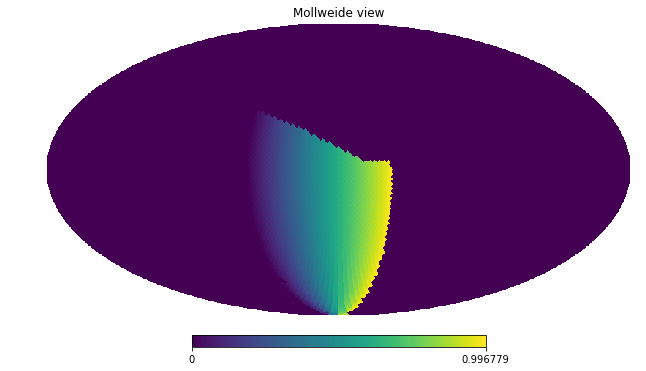

In [14]:
hp.mollview(scheduler.survey_lists[1][3].basis_functions[6](conditions))

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


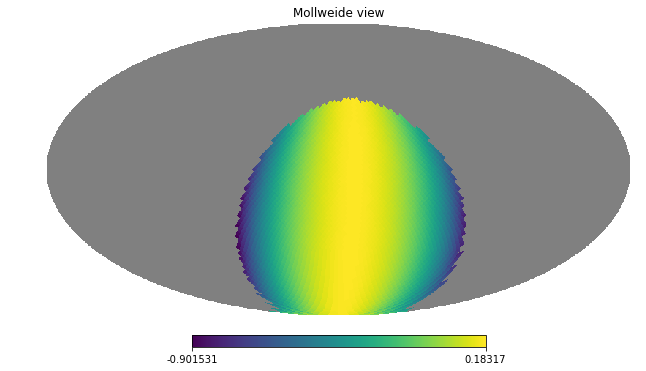

In [6]:
hp.mollview(scheduler.survey_lists[1][3].basis_functions[0](conditions))

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


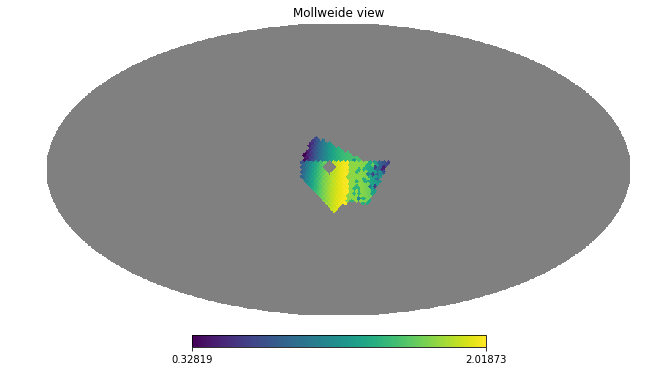

In [7]:
hp.mollview(scheduler.survey_lists[1][2].calc_reward_function(conditions))

In [8]:
np.degrees(conditions.sunAlt)

-35.799185882614438

In [9]:
59874.019529441 - 59853.9856438209

20.033885620097863

In [10]:
scheduler.survey_lists[1][3].basis_functions[6].season_start_hour, scheduler.survey_lists[1][3].basis_functions[6].season_end_hour

(-1.0471975511965976, 0.5235987755982988)

In [11]:
np.degrees(conditions.sunRA)

206.32298963782409